<a href="https://colab.research.google.com/github/GKurek94/Data-Science-projects/blob/main/Student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.__version__
import numpy as np
import plotly.express as px
import matplotlib

In [ ]:
StudentsPerformance = pd.read_csv('StudentsPerformance.csv')
StudentsPerformance

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
StudentsPerformance.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
StudentsPerformance.describe()
StudentsPerformance.columns = [col.replace(' ','_') for col in StudentsPerformance.columns]

In [ ]:
df = StudentsPerformance[['lunch','parental_level_of_education']]
df

,lunch,parental_level_of_education
0,standard,bachelor's degree
1,standard,some college
2,standard,master's degree
3,free/reduced,associate's degree
4,standard,some college
...,...,...
995,standard,master's degree
996,free/reduced,high school
997,free/reduced,high school
998,standard,some college


In [ ]:
df.parental_level_of_education.value_counts()


some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

In [ ]:
list_parental_lvl = list(df.parental_level_of_education.value_counts().nlargest(6))
weights = [3/6, 4/6, 2/6, 1/6, 5/6, 6/6]
zipped = zip(weights, list_parental_lvl)
edu_lvl_weighted = list(zipped)
edu_lvl_weighted = sorted(edu_lvl_weighted, key = lambda t: t[0])
edu_lvl_weighted

[(0.16666666666666666, 179),
 (0.3333333333333333, 196),
 (0.5, 226),
 (0.6666666666666666, 222),
 (0.8333333333333334, 118),
 (1.0, 59)]

In [ ]:
lista1= []
lista2= []
lista_names = ["some high school","high school", "associate's degree","some college", "bachelor's degree","master's degree"]
for ele in edu_lvl_weighted:
  lista1.append(ele[0])
  lista2.append(ele[1])
px.bar(x=lista_names, y=lista2, width = 700, title = "Amount of students with increasing level of education of their parents.")

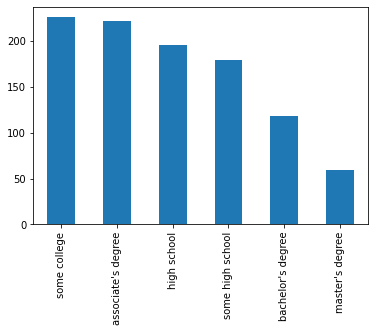

In [ ]:
df['parental_level_of_education'].value_counts().nlargest(10).plot.bar()

In [ ]:
df2 = df.value_counts().to_frame().sort_index(ascending=True)
df2

0
lunch        parental_level_of_education     
free/reduced associate's degree            77
             bachelor's degree             44
             high school                   70
             master's degree               24
             some college                  79
             some high school              61
standard     associate's degree           145
             bachelor's degree             74
             high school                  126
             master's degree               35
             some college                 147
             some high school             118

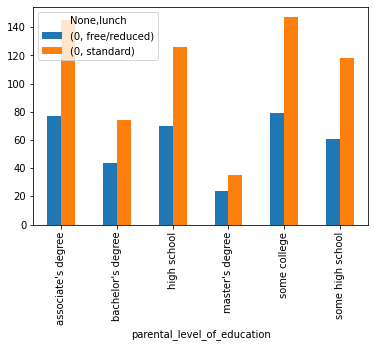

In [ ]:
df2.unstack(level=0).plot(kind='bar', subplots=False)

In [ ]:
df3 = df.groupby('parental_level_of_education')['lunch'].value_counts().to_frame()
df3

lunch
parental_level_of_education lunch              
associate's degree          standard        145
                            free/reduced     77
bachelor's degree           standard         74
                            free/reduced     44
high school                 standard        126
                            free/reduced     70
master's degree             standard         35
                            free/reduced     24
some college                standard        147
                            free/reduced     79
some high school            standard        118
                            free/reduced     61

In [ ]:
round(df3['lunch']["associate's degree"]['standard']/sum(df3['lunch']["associate's degree"]), 3)

0.653

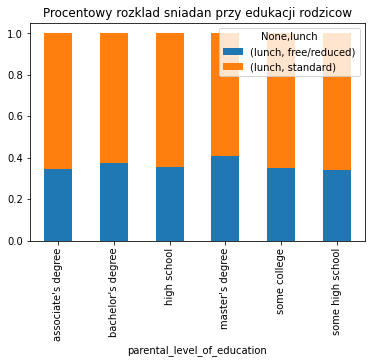

In [ ]:
df4 = df3.groupby(level='parental_level_of_education')['lunch'].apply(lambda y: y / y.sum()).to_frame()
df4.unstack(level=1).plot(kind='bar', subplots=False, title = "Precentage diversion of student's breakfasts with the level of eduaction of their parents shown.", stacked=True)

## The goal of this project was to find not obviously interesting case in this dataset. Correlation between parents's level of education and their child's breakfast should be related to financial aspect of family, which seemed interesting.